# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'appid=' + weather_api_key + '&q=' + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] - 273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind =  city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rawson
Processing Record 2 of Set 1 | saleaula
City not found. Skipping...
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | the valley
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | marzuq
Processing Record 8 of Set 1 | noumea
Processing Record 9 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 10 of Set 1 | winslow
Processing Record 11 of Set 1 | rio grande
Processing Record 12 of Set 1 | roald
Processing Record 13 of Set 1 | trairi
Processing Record 14 of Set 1 | kadykchan
City not found. Skipping...
Processing Record 15 of Set 1 | mount gambier
Processing Record 16 of Set 1 | hambantota
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | nikolskoye
Processing Record 19 of Set 1 | ponta do sol
Processing Record 20 of Set 1 | campo grande
Processing R

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rawson,-43.3002,-65.1023,19.48,60,28,7.11,AR,1675298378
1,hilo,19.7297,-155.0900,27.93,77,0,5.14,US,1675298379
2,the valley,18.2170,-63.0578,25.05,77,0,7.70,AI,1675298379
3,thompson,55.7435,-97.8558,-28.91,69,40,5.14,CA,1675298353
4,kapaa,22.0752,-159.3190,27.18,73,0,4.12,US,1675298380


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../WeatherPy/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../WeatherPy//cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rawson,-43.3002,-65.1023,19.48,60,28,7.11,AR,1675298378
1,hilo,19.7297,-155.0900,27.93,77,0,5.14,US,1675298379
2,the valley,18.2170,-63.0578,25.05,77,0,7.70,AI,1675298379
3,thompson,55.7435,-97.8558,-28.91,69,40,5.14,CA,1675298353
4,kapaa,22.0752,-159.3190,27.18,73,0,4.12,US,1675298380


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

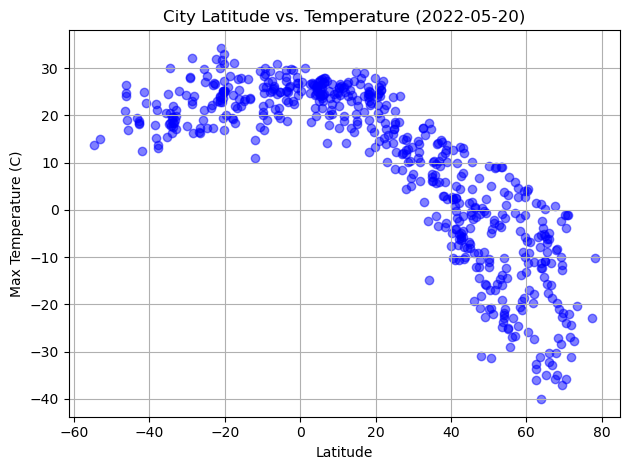

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],alpha=0.5,marker='o',color='blue')

# Incorporate the other graph properties
plt.grid(True)
plt.title('City Latitude vs. Temperature (2022-05-20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.tight_layout()


# Save the figure
plt.savefig("../WeatherPy/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

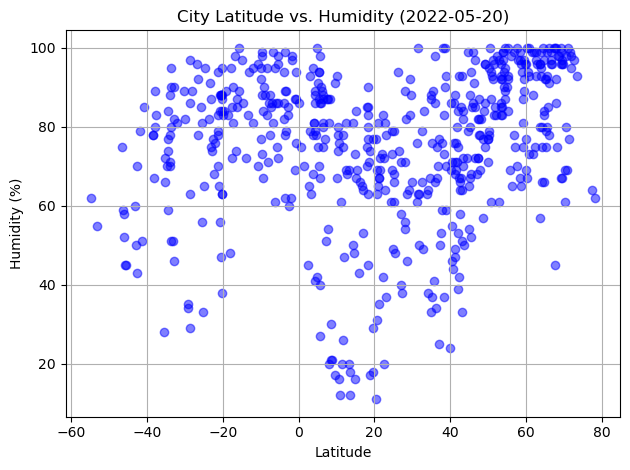

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],alpha=0.5,marker='o',color='blue')

# Incorporate the other graph properties
plt.grid(True)
plt.title('City Latitude vs. Humidity (2022-05-20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()

# Save the figure
plt.savefig("../WeatherPy//Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

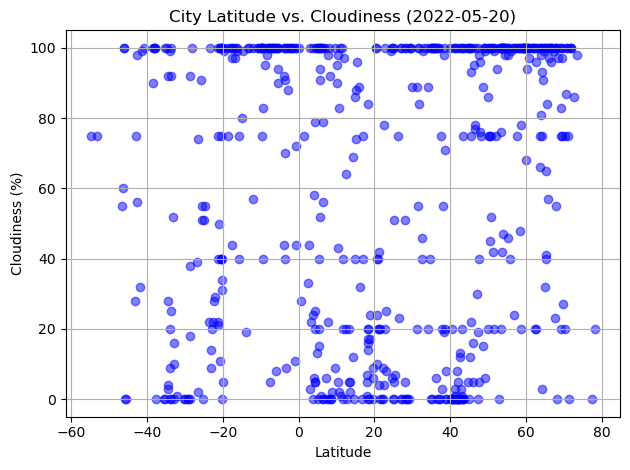

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],alpha=0.5,marker='o',color='blue')

# Incorporate the other graph properties
plt.grid(True)
plt.title('City Latitude vs. Cloudiness (2022-05-20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()

# Save the figure
plt.savefig("../WeatherPy//Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

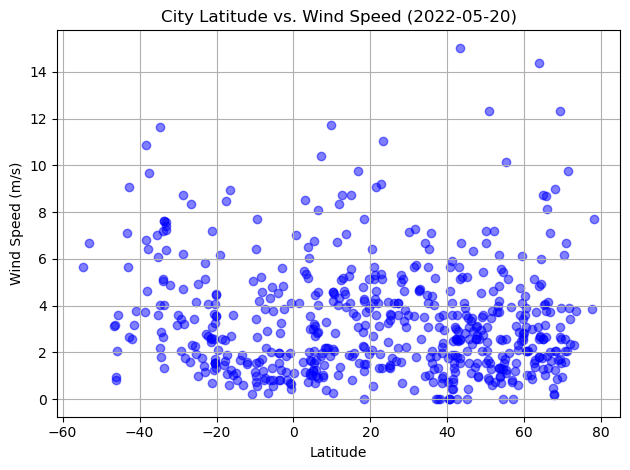

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],alpha=0.5,marker='o',color='blue')

# Incorporate the other graph properties
plt.grid(True)
plt.title('City Latitude vs. Wind Speed (2022-05-20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.tight_layout()

# Save the figure
plt.savefig("../WeatherPy//Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hilo,19.7297,-155.0900,27.93,77,0,5.14,US,1675298379
2,the valley,18.2170,-63.0578,25.05,77,0,7.70,AI,1675298379
3,thompson,55.7435,-97.8558,-28.91,69,40,5.14,CA,1675298353
4,kapaa,22.0752,-159.3190,27.18,73,0,4.12,US,1675298380
5,marzuq,14.4000,46.4667,16.48,50,12,1.90,YE,1675298380


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rawson,-43.3002,-65.1023,19.48,60,28,7.11,AR,1675298378
6,noumea,-22.2763,166.4572,31.99,68,28,4.09,NC,1675298381
8,rio grande,-32.0350,-52.0986,25.06,81,1,4.88,BR,1675298082
10,trairi,-3.2778,-39.2689,24.97,89,100,3.25,BR,1675298291
11,mount gambier,-37.8333,140.7667,13.09,89,100,6.43,AU,1675298383


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7556248817805273


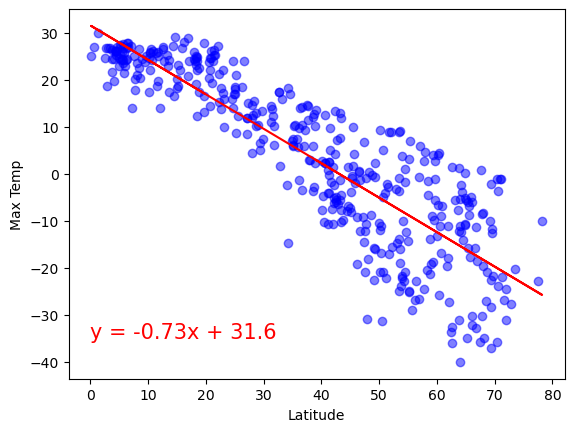

In [14]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',alpha=0.5,color='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {r_value**2}")


The r-squared is: 0.1847954873708391


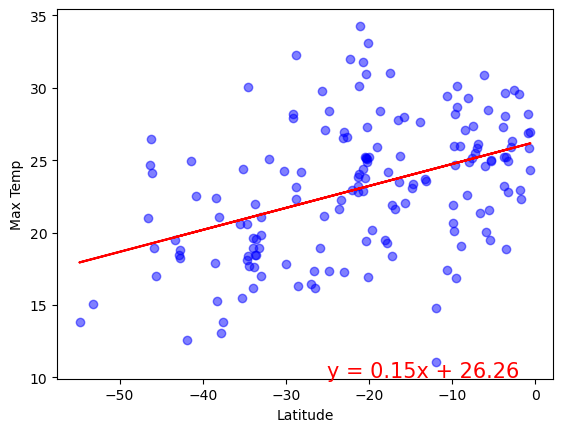

In [15]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',alpha=0.5,color='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {r_value**2}")

**Discussion about the linear relationship:**  
# Linear regression on Northern Hemisphere
The R-squared value of 0.75 in our linear regression model shows us that 75% of the changes in the dependent variable (y) can be explained by the independent variable (x). That means about 25% of the changes in y aren't accounted for by the model.

The equation, y = -0.73x + 31.6, describes the relationship between x and y in the model. The intercept, 31.6, is what y would be estimated to be if x was 0, and the slope, -0.73, represents the estimated change in y for every 1 unit change in x.

The high R-squared value suggests that the model fits the data well and that x has a significant impact on y. This leads us to believe that the model could be used for making predictions about y based on x. However, it's always important to double check the model's validity by examining the assumptions and conducting proper statistical tests to make sure it accurately represents the relationship between x and y.
# Linear regression on Southern Hemisphere

The R-squared value of 0.18 in our linear regression model suggests that only 18% of the changes in the dependent variable (y) can be explained by the independent variable (x). That leaves us with 82% of the changes in y that aren't accounted for by the model. The low R-squared value implies that the model doesn't fit the data well and that other variables or factors might be influencing the dependent variable. In other words, the model doesn't accurately reflect the relationship between x and y, so it may not be suitable for making predictions.






### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.16774751257840503


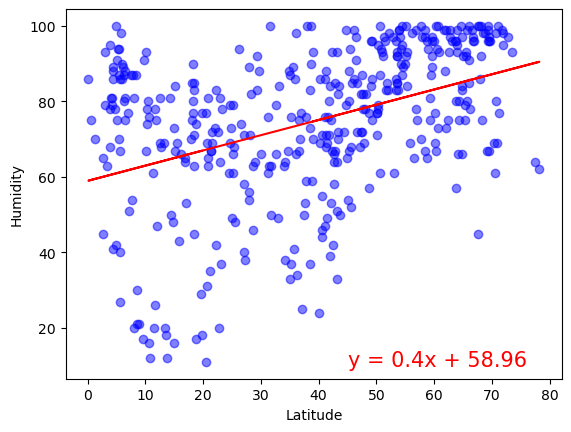

In [16]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',alpha=0.5,color='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {r_value**2}")

The r-squared is: 0.18864143453234247


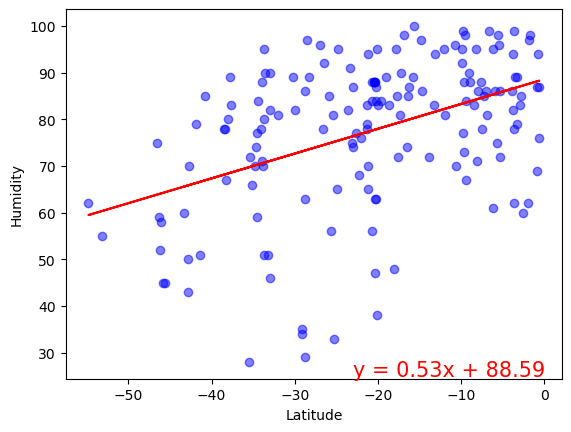

In [17]:
#Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',alpha=0.5,color='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-23,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {r_value**2}")

**Discussion about the linear relationship:** 

# Northern Hemisphere & Southern Hemisphere
The R-squared value of 0.16 & 0.18 in our linear regression model suggests that only 16% & 18% of the changes in the dependent variable (y) can be explained by the independent variable (x). That leaves us with ~85% of the changes in y that aren't accounted for by the model. The low R-squared value implies that the model doesn't fit the data well and that other variables or factors might be influencing the dependent variable. In other words, the model doesn't accurately reflect the relationship between x and y, so it may not be suitable for making predictions.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.10640483568473309


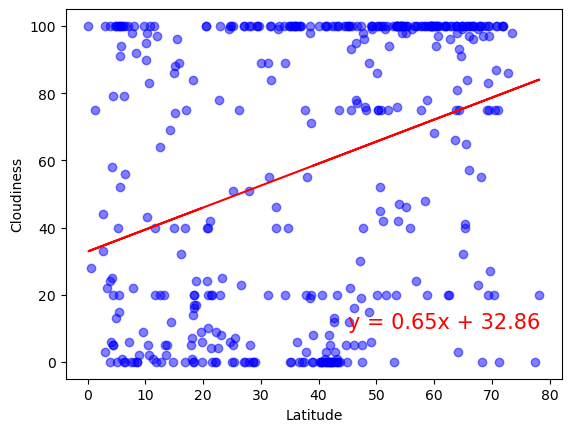

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',alpha=0.5,color='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {r_value**2}")

The r-squared is: 0.1110109519417567


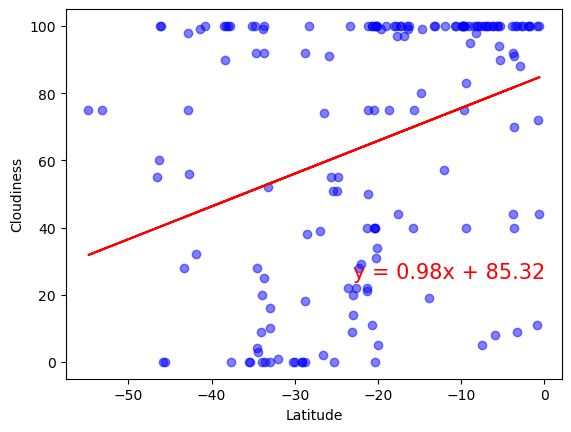

In [19]:
#Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',alpha=0.5,color='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-23,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {r_value**2}")

**Discussion about the linear relationship:** 
Analysis here will be identical to the one I have provided above. The low R-squared value implies that the model doesn't fit the data well and that other variables or factors might be influencing the dependent variable. In other words, the model doesn't accurately reflect the relationship between x and y, so it may not be suitable for making predictions.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0030414070705317873


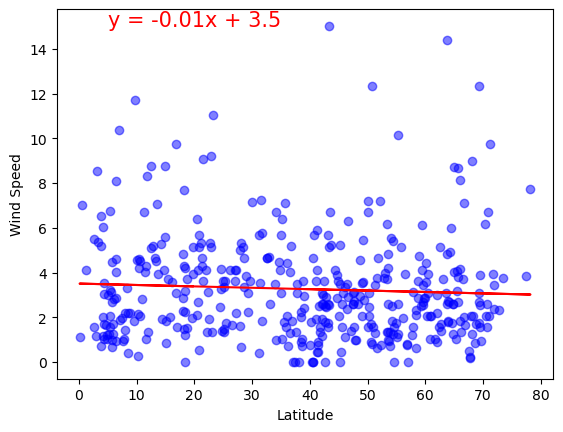

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',alpha=0.5,color='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {r_value**2}")

The r-squared is: 0.1745676003393435


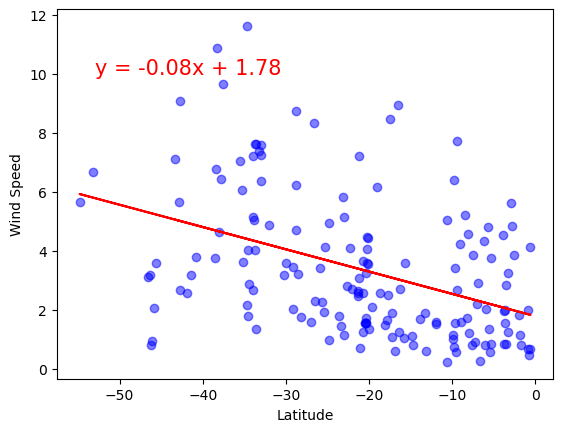

In [21]:
#Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',alpha=0.5,color='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-53,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {r_value**2}")

**Discussion about the linear relationship:** 
Analysis here will be identical to the one I have provided above. The low R-squared value implies that the model doesn't fit the data well and that other variables or factors might be influencing the dependent variable. In other words, the model doesn't accurately reflect the relationship between x and y, so it may not be suitable for making predictions.